In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dev = pd.read_csv('ETH-USD-DEV.csv',sep=';')
data_oot = pd.read_csv('ETH-USD-OOT.csv',sep=';')

In [3]:
data_dev.head()

,y_target,Open,High,Low,Close,Volume,1PeriodRange,Open_MA_10,High_MA_10,Low_MA_10,...,dist_Open_MA_200,dist_High_MA_200,dist_Low_MA_200,dist_Close_MA_200,1PeriodRange_by_1PeriodRange_MA_200,1PeriodVolume_by_Volume_MA_200,RSI_Close_5,RSI_Close_9,RSI_Close_14,RSI_Close_18
0,1,0.978095,0.978095,0.977748,0.978068,23.944323,0.000347,0.978288,0.978478,0.978212,...,1.001124,1.000922,1.000908,1.001054,1.042293,2.163110,39.107958,36.414451,36.026530,37.332560
1,1,0.978041,0.978041,0.978041,0.978041,0.034019,0.000000,0.978232,0.978422,0.978156,...,1.001059,1.000856,1.001190,1.001008,0.000000,0.003453,38.310039,35.961921,35.736440,37.105500
2,1,0.978001,0.978736,0.978001,0.978669,5.627779,0.000734,0.978174,0.978435,0.978098,...,1.001000,1.001556,1.001131,1.001640,2.302219,0.577272,61.389287,51.742408,46.550009,45.306230
3,1,0.978656,0.978669,0.978656,0.978669,0.731721,0.000013,0.978180,0.978442,0.978104,...,1.001652,1.001477,1.001783,1.001630,0.042827,0.075219,61.386233,51.739661,46.547496,45.303834
4,1,0.978736,0.978736,0.978055,0.978055,0.218069,0.000681,0.978194,0.978363,0.978064,...,1.001723,1.001535,1.001161,1.000994,2.160559,0.022439,39.045008,39.637520,39.080089,39.630692


In [4]:
data_dev.describe()

,y_target,Open,High,Low,Close,Volume,1PeriodRange,Open_MA_10,High_MA_10,Low_MA_10,...,dist_Open_MA_200,dist_High_MA_200,dist_Low_MA_200,dist_Close_MA_200,1PeriodRange_by_1PeriodRange_MA_200,1PeriodVolume_by_Volume_MA_200,RSI_Close_5,RSI_Close_9,RSI_Close_14,RSI_Close_18
count,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,...,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,1.038900e+04,10389.000000,10389.000000,10389.000000,10389.000000
mean,0.250072,0.995749,0.995861,0.995636,0.995752,8.959656,0.000225,0.995750,0.995861,0.995637,...,0.999952,0.999955,0.999949,0.999952,1.071133,1.038868e+00,55.374862,54.615027,53.863814,53.413720
std,0.433075,0.022643,0.022612,0.022686,0.022650,21.559852,0.000501,0.022631,0.022600,0.022674,...,0.005096,0.005087,0.005120,0.005108,2.691017,2.415800e+00,30.021848,26.137877,22.777377,20.750482
min,0.000000,0.930040,0.930200,0.930026,0.930026,0.000003,0.000000,0.931026,0.931324,0.930698,...,0.978362,0.978139,0.978655,0.978544,0.000000,2.160000e-07,0.023898,0.162854,0.404890,0.904808
25%,0.000000,0.980578,0.980591,0.980538,0.980591,0.626500,0.000000,0.980507,0.980584,0.980427,...,0.996991,0.996983,0.996960,0.996979,0.000000,8.179770e-02,32.122935,35.927174,38.380168,39.440073
50%,0.000000,0.997811,0.997811,0.997744,0.997811,2.334100,0.000000,0.997689,0.997777,0.997672,...,1.000378,1.000360,1.000393,1.000382,0.000000,2.996312e-01,57.359185,55.279485,53.700451,53.109304
75%,1.000000,1.012121,1.012347,1.011934,1.012081,8.207200,0.000174,1.012214,1.012327,1.012094,...,1.003385,1.003372,1.003406,1.003392,0.789857,9.679319e-01,82.084289,75.052962,70.286394,67.770216
max,1.000000,1.035854,1.035854,1.035854,1.035854,362.448304,0.006394,1.033513,1.034036,1.033512,...,1.018483,1.018800,1.018064,1.018961,83.641975,6.003521e+01,99.988913,99.944094,99.833129,99.667012


In [5]:
data_oot.columns

Index(['y_target', 'Open', 'High', 'Low', 'Close', 'Volume', '1PeriodRange',
       'Open_MA_10', 'High_MA_10', 'Low_MA_10', 'Close_MA_10', 'Volume_MA_10',
       '1PeriodRange_MA_10', '10_periodRange_MA', 'Open_MA_20', 'High_MA_20',
       'Low_MA_20', 'Close_MA_20', 'Volume_MA_20', '1PeriodRange_MA_20',
       '20_periodRange_MA', 'Open_MA_50', 'High_MA_50', 'Low_MA_50',
       'Close_MA_50', 'Volume_MA_50', '1PeriodRange_MA_50',
       '50_periodRange_MA', 'Open_MA_100', 'High_MA_100', 'Low_MA_100',
       'Close_MA_100', 'Volume_MA_100', '1PeriodRange_MA_100',
       '100_periodRange_MA', 'Open_MA_200', 'High_MA_200', 'Low_MA_200',
       'Close_MA_200', 'Volume_MA_200', '1PeriodRange_MA_200',
       '200_periodRange_MA', 'growth', 'num_consec_periods_up',
       'num_consec_periods_down', 'rets', 'rets_mean', 'rets_sigma', 'VaR',
       'dist_Open_MA_10', 'dist_High_MA_10', 'dist_Low_MA_10',
       'dist_Close_MA_10', '1PeriodRange_by_1PeriodRange_MA_10',
       '1PeriodVolume_by_

In [6]:
#,'1PeriodRange',"Open_MA_10","High_MA_10","Low_MA_10","Close_MA_10","Volume_MA_10","1PeriodRange_MA_10"
#,"Volume_MA_10","1PeriodRange_MA_10","1PeriodRange_MA_20","20_periodRange_MA"
#"High","Low",
cols = ["y_target","Open","Close","Volume","Volume_MA_10","dist_Close_MA_10","Volume_MA_100","1PeriodRange_by_1PeriodRange_MA_200", 'growth', 'num_consec_periods_up',
       'num_consec_periods_down', 'rets', 'rets_mean', 'rets_sigma', 'VaR']

data_d = data_dev[cols]
data_o = data_oot[cols]


In [7]:
target = 'y_target'
X = data_d[cols]
X = X.drop(columns=[target])

Xo = data_o[cols]
Xo = Xo.drop(columns=[target])

In [8]:
y = data_dev['y_target']

In [9]:
X.shape,y.shape

((10389, 14), (10389,))

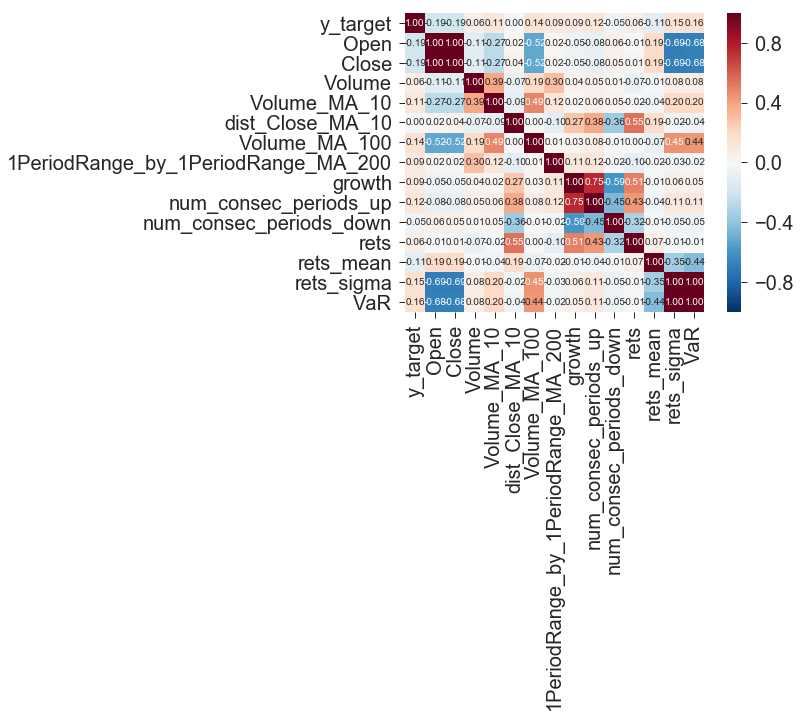

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cols = ["Open","High","Low","Close","Volume","y_target"]
cm = np.corrcoef(data_d[cols].values.T)
sns.set(font_scale=2,style="ticks", color_codes=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols,xticklabels=cols)
plt.show()

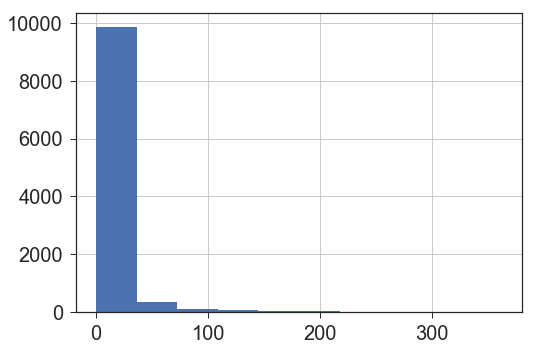

In [11]:
data_dev["Volume"].hist()

In [12]:
#scaler = MinMaxScaler()
#scaler.fit(X[['Volume']])
#scaler.mean_
#X[['Volume']] = scaler.transform(X[['Volume']])

In [13]:
#X.describe()

In [ ]:
#from sklearn.linear_model.logistic import LogisticRegression
#model = LogisticRegression()
#result = model.fit(X, y)
#y_pred = result.predict(X)
#y_predo = result.predict(Xo)

In [ ]:
#from sklearn.metrics import roc_auc_score
#gini_score_dev = 2*roc_auc_score(data_dev['y_target'], y_pred)-1
#print ("GINI DEV=", gini_score_dev)


#gini_score_oot = 2*roc_auc_score(data_oot['y_target'], y_predo)-1
#print ("GINI OOT=", gini_score_oot)

# Model Dummy

In [14]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X, y)
print('Score of Dummy Classifier most_frequent in train: %.3f' % clf.score(X, y))

Score of Dummy Classifier most_frequent in train: 0.750


In [15]:
y_pred = clf.predict(X)
y_predo = clf.predict(Xo)

In [16]:
from sklearn.metrics import roc_auc_score
gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
print("GINI DEV=", gini_score_dev)
gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
print("GINI OOT=", gini_score_oot)
print()
print()

GINI DEV= 0.0
GINI OOT= 0.0




# Model Volting Classifier

In [89]:
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
import itertools


clf1 = LogisticRegression(random_state=42,C=0.001)
clf2 = RandomForestClassifier(random_state=42,max_leaf_nodes=1000,n_estimators=1000)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_leaf_nodes=1000)
clf5 = KNeighborsClassifier(n_neighbors=5,leaf_size=1000)
clf6 = SVC(kernel='rbf', probability=True,C=0.01)
clf7 = AdaBoostClassifier(n_estimators=1000)
clf8 = GradientBoostingClassifier(n_estimators=1000)

#x1 = X_train.values
#y1 = y_train.values

#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf = VotingClassifier(estimators=[('lr', clf1)
                                    ,('rf', clf2)
                                    ,('gnb', clf3)
                                    ,('DTree', clf4)
                                    ,('KN', clf5)
                                    ,('SVC', clf6)
                                    ,('AdaBoost', clf7)
                                    ,('GradientBoosting', clf8)
                                   ]
                        ,voting='soft'
                        ,weights=[1,1,1,1,1,1,1,1])


clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
clf4 = clf4.fit(X,y)
clf5 = clf5.fit(X,y)
clf6 = clf6.fit(X,y)
clf7 = clf7.fit(X,y)
clf8 = clf8.fit(X,y)
eclf = eclf.fit(X,y)

lb = ['Logistic Regression','Random Forest', 'naive Bayes', 'DecisionTree','KNeighbors','SVC','AdaBoost','GradientBoosting', 'Ensemble']

for clf, label, grd in zip([clf1, clf2, clf3,clf4,clf5,clf6,clf7,clf8,eclf], lb,itertools.product([0, 1, 2], repeat=2)):
    scores = cross_val_score(clf, X, y, cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
    y_pred = clf.predict(X)
    y_predo = clf.predict(Xo)
    
    from sklearn.metrics import roc_auc_score
    gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
    print("GINI DEV=", gini_score_dev)
    gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
    print("GINI OOT=", gini_score_oot)
    print()
    print()
    

Accuracy: 0.75 (+/- 0.00) [Logistic Regression]
GINI DEV= 0.006286343898315838
GINI OOT= 0.005655684628229629


Accuracy: 0.59 (+/- 0.15) [Random Forest]
GINI DEV= 1.0
GINI OOT= 0.06771917199910571


Accuracy: 0.64 (+/- 0.17) [naive Bayes]
GINI DEV= 0.14249520453961373
GINI OOT= 0.13740227191944787


Accuracy: 0.54 (+/- 0.13) [DecisionTree]
GINI DEV= 1.0
GINI OOT= 0.02581688870384835


Accuracy: 0.63 (+/- 0.06) [KNeighbors]
GINI DEV= 0.6203312995423449
GINI OOT= 0.014093197443045158


Accuracy: 0.75 (+/- 0.00) [SVC]
GINI DEV= 0.0
GINI OOT= 0.0


Accuracy: 0.61 (+/- 0.13) [AdaBoost]
GINI DEV= 0.4795862046069026
GINI OOT= 0.15608305403563993


Accuracy: 0.60 (+/- 0.14) [GradientBoosting]
GINI DEV= 0.9307150460515374
GINI OOT= 0.1167188023874759


Accuracy: 0.63 (+/- 0.13) [Ensemble]
GINI DEV= 0.9453425712086219
GINI OOT= 0.07541787026590918




# Comprobación de modelos por separado

#### RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_regression = RandomForestRegressor(max_depth=9, random_state=2,n_estimators=500)
rf_regression.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [18]:
y_pred = rf_regression.predict(X)
y_predo = rf_regression.predict(Xo)

In [19]:
from sklearn.metrics import roc_auc_score
gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
print("GINI DEV=", gini_score_dev)
gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
print("GINI OOT=", gini_score_oot)
print()
print()

GINI DEV= 0.8847604404086788
GINI OOT= 0.13794183950517547




#### AdaBoostRegressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor

ab_regression = AdaBoostRegressor(n_estimators=1000)
print(ab_regression)

ab_regression.fit(X, y)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=1000, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=1000, random_state=None)

In [84]:
y_pred = ab_regression.predict(X)
y_predo = ab_regression.predict(Xo)

In [83]:
from sklearn.metrics import roc_auc_score
gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
print("GINI DEV=", gini_score_dev)
gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
print("GINI OOT=", gini_score_oot)
print()
print()

GINI DEV= 0.43355576285738207
GINI OOT= 0.34136202089960976




#### GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regression = GradientBoostingRegressor(n_estimators=500, max_depth=4,
                                          min_samples_split=2,
                                          learning_rate=0.01, loss='ls')
gb_regression.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [31]:
y_pred = gb_regression.predict(X)
y_predo = gb_regression.predict(Xo)

In [32]:
from sklearn.metrics import roc_auc_score
gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
print("GINI DEV=", gini_score_dev)
gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
print("GINI OOT=", gini_score_oot)
print()
print()

GINI DEV= 0.8058293313113007
GINI OOT= 0.1271203793607667




#### SVR

In [26]:
from sklearn.svm import SVR
import sklearn.preprocessing as skpp

# Estandarizamos los datos, salvo la última columna que es la clase:
scalerX = skpp.StandardScaler()
scalerX.fit(X)
x_train_scal = scalerX.transform(X)
x_test_scal = scalerX.transform(Xo)

#x_train_scal = x_train
#x_test_scal = x_test

# Model construction
#svr = SVR(kernel='linear',epsilon=10000,C=1000)
svr = SVR(kernel='linear',epsilon=10000,C=100)
#svr = SVR(kernel='rbf',epsilon=10000,C=10000)

svr.fit(x_train_scal, y)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=10000, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = svr.predict(X)
y_predo = svr.predict(Xo)

In [30]:
from sklearn.metrics import roc_auc_score
gini_score_dev = 2*roc_auc_score(data_d[target], y_pred)-1
print("GINI DEV=", gini_score_dev)
gini_score_oot = 2*roc_auc_score(data_o[target], y_predo)-1
print("GINI OOT=", gini_score_oot)
print()
print()

GINI DEV= 0.0
GINI OOT= 0.0


